#  Imports

In [3]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
from data_processor1 import cleaner

# Data processing

Importing gpu power data as gpu and total power data as total.

In [4]:
gpu = cleaner('C:/Users/sera/Documents/Project/Data/gpupower.csv') #edit this path
total = pd.read_csv('C:/Users/sera/Documents/Project/Data/totalpower.csv') #edit this path

gpu['Index'] = np.arange(0, len(gpu))
total['Index'] = np.arange(0, len(total))

gpu.head(3)

,Time,Power,Index
1,19:50:45,14.0,0
2,19:50:46,14.0,1
3,19:50:47,14.0,2


Making a nice line graph of the total power:

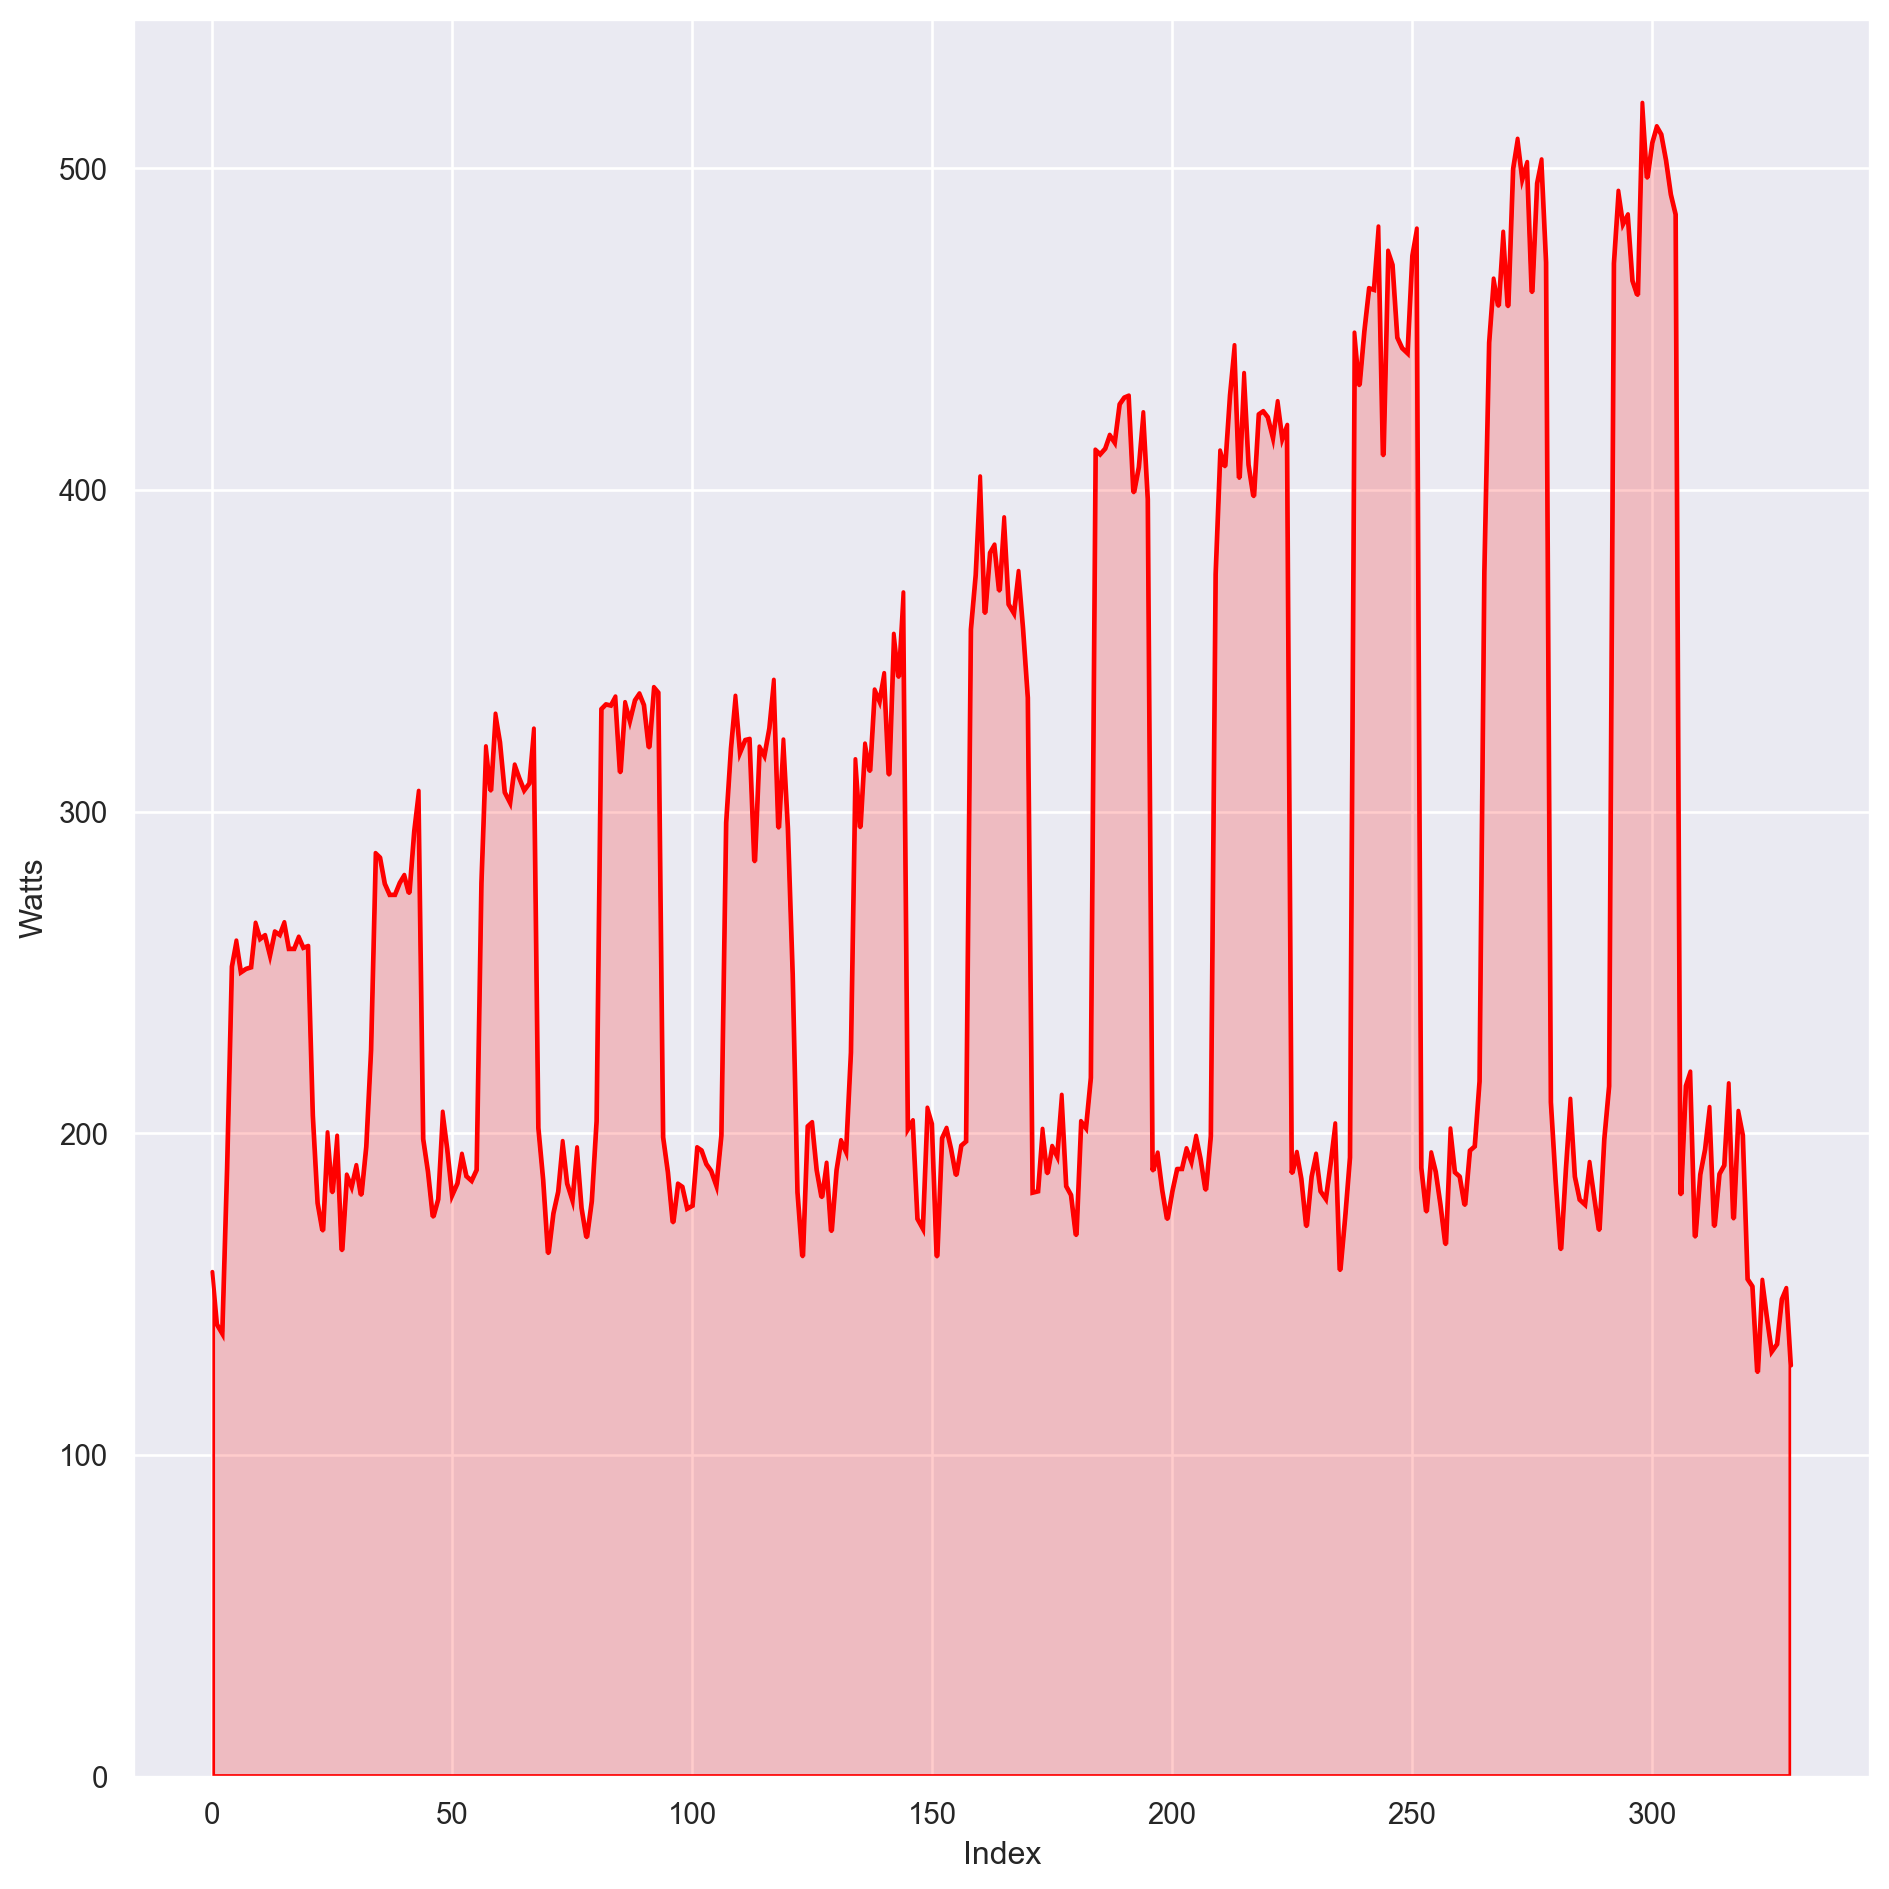

In [5]:
so.Plot(data=total, x='Index', y='Watts').add(so.Lines(color='Red')).limit().add(so.Area(color='Red')).layout(size=(10,10)).save(
    'Data/Total_power_figure')

Doing the same with gpu power:

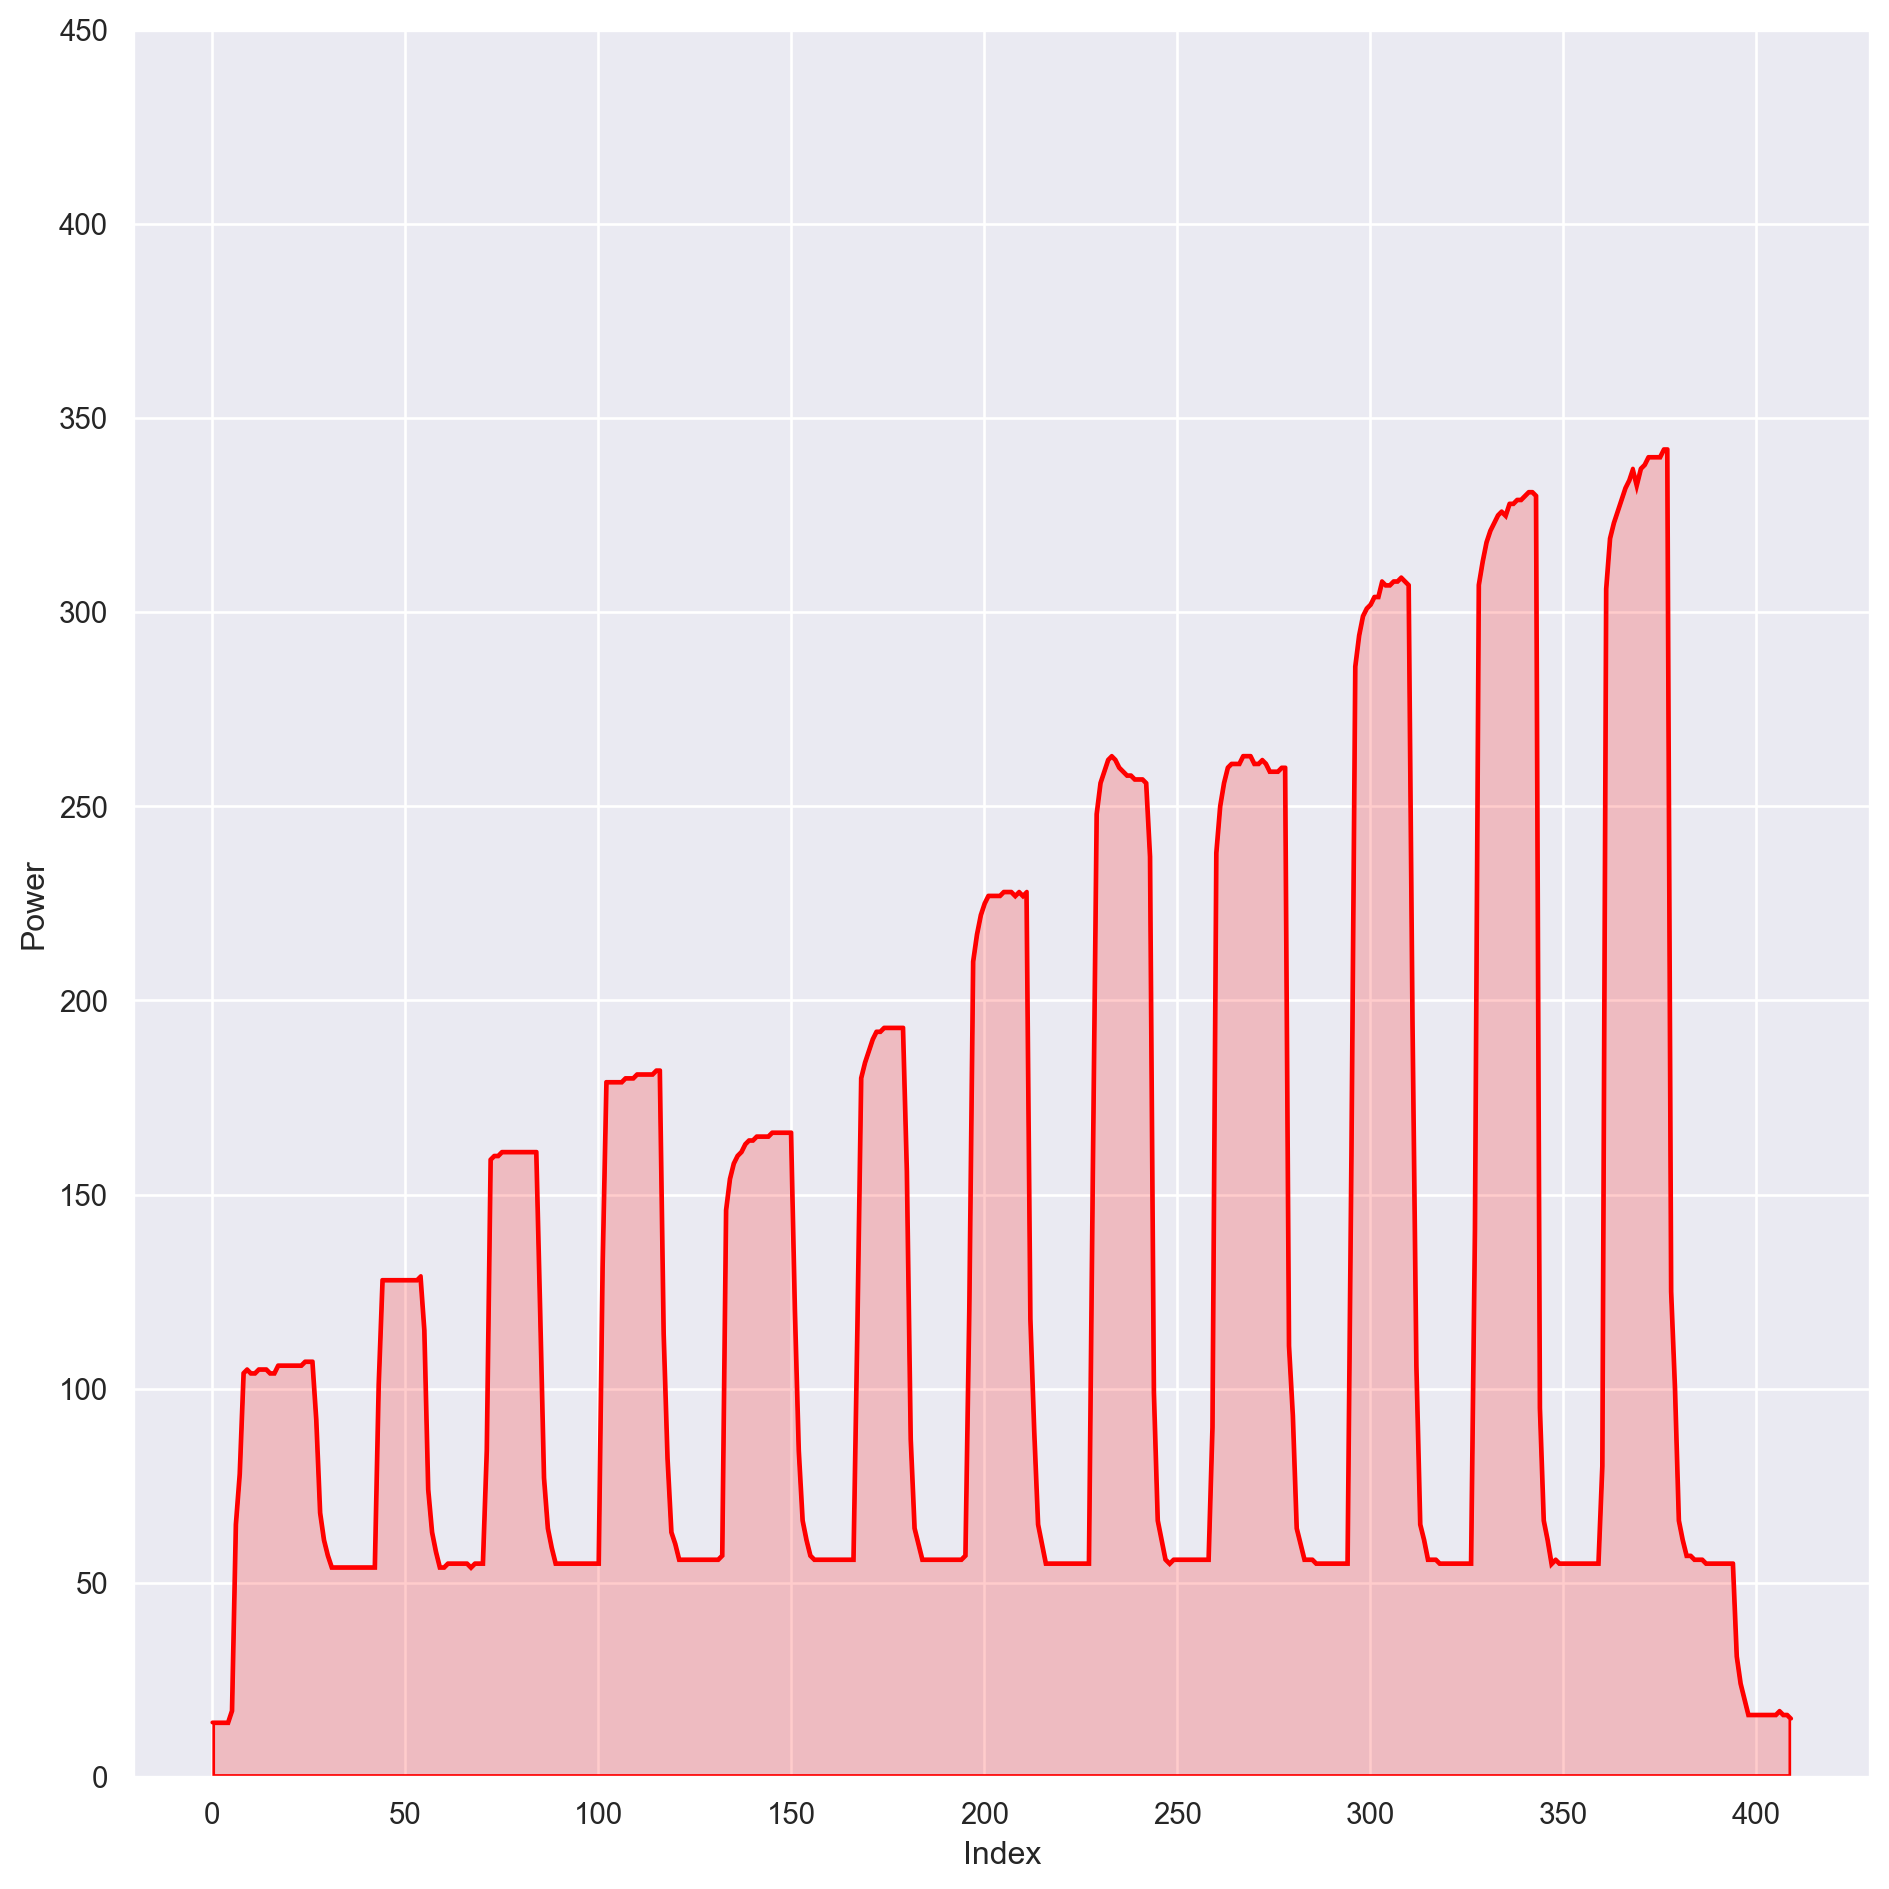

In [6]:
so.Plot(data=gpu, x='Index', y='Power').add(so.Lines(color='Red')).limit(y=(0,450)).add(so.Area(color='Red')).layout(size=(10,10)).save(
    'Data/gpu_power_figure')